# CANCER PATIENT DATA

El conjunto de datos "cancer_patient_data" es especial y útil porque contiene múltiples características relacionadas con factores de riesgo y síntomas de pacientes con cáncer, lo que permite una evaluación exhaustiva de los diferentes factores que pueden influir en la condición de los pacientes. Es útil para construir modelos predictivos para predecir el riesgo de cáncer, realizar análisis epidemiológicos, y desarrollar estrategias de prevención y tratamiento personalizado. Su amplia gama de atributos proporciona una rica fuente de datos para investigaciones médicas y análisis estadísticos en el ámbito de la salud.

In [1]:
import sys
import os
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(project_root)

from src.DataPreparer import DataPreparer
from src.FormalContext import FormalContext
from src.OtherModels import *
from src import FCADecisionTree as FCADtree

import pandas as pd

DATA_CSV_FILE_PATH = 'C:\\Users\\Focus\\Desktop\\TFG\\TFG\\fca-decision-tree-classifier\\datasets\\real_datasets\\cancer_patient_data.csv'
TREES_MAX_DEPTH = 4

df = pd.read_csv(DATA_CSV_FILE_PATH)
df.describe()


,index,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
count,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,...,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,288.819436,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,...,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,0.000000,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,249.750000,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,499.500000,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,...,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,749.250000,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,...,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,999.000000,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,...,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

In [3]:
df

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,P995,44,1,6,7,7,7,7,6,...,5,3,2,7,8,2,4,5,3,High
996,996,P996,37,2,6,8,7,7,7,6,...,9,6,5,7,2,4,3,1,4,High
997,997,P997,25,2,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
998,998,P998,18,2,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [4]:
df = df.drop(columns=['index', 'Patient Id'])

# Prueba inicial del árbol básico c4.5, obtención de sus umbrales

In [5]:
from src.DecisionTreeC45 import DecisionTreeC45
from sklearn.model_selection import train_test_split

data = df.copy()
taget_column = -1


X = data.iloc[:, :-1]  # Todas las columnas excepto la última
y = data.iloc[:, -1]   # La última columna

# Convertir X a una lista de listas y y a una lista
X_list = X.values.tolist()
y_list = y.values.tolist()

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_list, y_list, test_size=0.2, random_state=42)

# Entrenar el modelo de árbol de decisión C4.5
attribute_names = X.columns.tolist()

decision_tree_c45 = DecisionTreeC45(attribute_names=attribute_names, max_depth=TREES_MAX_DEPTH)
decision_tree_c45.train_tree(X_train, y_train)


predictions_treec45 = decision_tree_c45.classify_instances(X_test)

decision_tree_c45.evaluation_metrics(y_test, predictions_treec45, average='macro') 
decision_tree_c45.print_tree_structure()

# Obtener los umbrales de los atributos continuos
thresholds = decision_tree_c45.get_thresholds()

print("Umbrales de los atributos continuos:", thresholds)

Accuracy: 0.955
Precision: 0.953125
Recall: 0.9523809523809524
F1 Score: 0.949148890325361
Confusion Matrix:
[[82  0  0]
 [ 0 55  0]
 [ 0  9 54]]
Classification Report:
              precision    recall  f1-score   support

        High       1.00      1.00      1.00        82
         Low       0.86      1.00      0.92        55
      Medium       1.00      0.86      0.92        63

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.96      0.95      0.95       200

Attribute: Passive Smoker <= 6.5
  Attribute: Fatigue <= 7.0
    Attribute: Wheezing <= 4.5
      Attribute: Obesity <= 4.5
        Decision: Low
        Decision: Medium
      Decision: Medium
    Decision: High
  Decision: High
Umbrales de los atributos continuos: {11: [6.5], 14: [7.0], 17: [4.5], 9: [4.5]}


# Preparado de los datos, utilización de los mismos umbrales del C4.5

In [6]:
data_preparer = DataPreparer()
data_preparer.prepare_csvfile_data(
    file_path=DATA_CSV_FILE_PATH,
    discretizing_thresholds=thresholds  # Pasar los umbrales obtenidos del modelo C4.5
)

X_train, X_test, y_train, y_test = data_preparer.get_train_test_split_data_binarized()
labeled_train_data = pd.concat([X_train, y_train.reset_index(drop=True)], axis=1)

objects = list(labeled_train_data.index)
properties = [prop for prop in labeled_train_data.columns if prop != 'objective_target']
num_objects = len(objects)
num_properties = len(properties)

print(f"Number of Objects: {num_objects}")
print(f"Number of Properties-Attributes: {num_properties}")

labeled_train_data.info()

Number of Objects: 800
Number of Properties-Attributes: 2183
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Columns: 2184 entries, index_0 to objective_target
dtypes: float64(2183), object(1)
memory usage: 13.3+ MB


# Computación del contexto formal y prueba del árbol FCA:

Tamaño máximo del contexto: 1746400
Tiempo de ejecución para el retículo: 78.27 segundos

Finalizando Algoritmo:
Número de conceptos formales: 5559

Vector a clasificar:  ['index_521', 'Patient Id_P568', 'Age_48', 'Gender_2', 'Air Pollution_1', 'Alcohol use_6', 'Dust Allergy_7', 'OccuPational Hazards_8', 'Genetic Risk_7', 'chronic Lung Disease_1', 'Balanced Diet_7', 'Obesity_1', 'Smoking_3', 'Passive Smoker_4', 'Chest Pain_1', 'Coughing of Blood_7', 'Fatigue_3', 'Weight Loss_0', 'Shortness of Breath_6', 'Wheezing_4', 'Swallowing Difficulty_2', 'Clubbing of Finger Nails_3', 'Frequent Cold_1', 'Dry Cough_2', 'Snoring_1']
└──Nivel 0: Nodo actual (Intent: [], Label: ROOT), Mejor coincidencia (Intent: [2027])
│   └──Nivel 1: Nodo actual (Intent: [2027], Label: Medium), Mejor coincidencia (Intent: [2027, 2064, 2080, 2082])
Resultado final: Nodo (Intent: [2027, 2064, 2080, 2082], Label: Medium)

Vector a clasificar:  ['index_737', 'Patient Id_P762', 'Age_62', 'Gender_1', 'Air Pollution_6', 'A

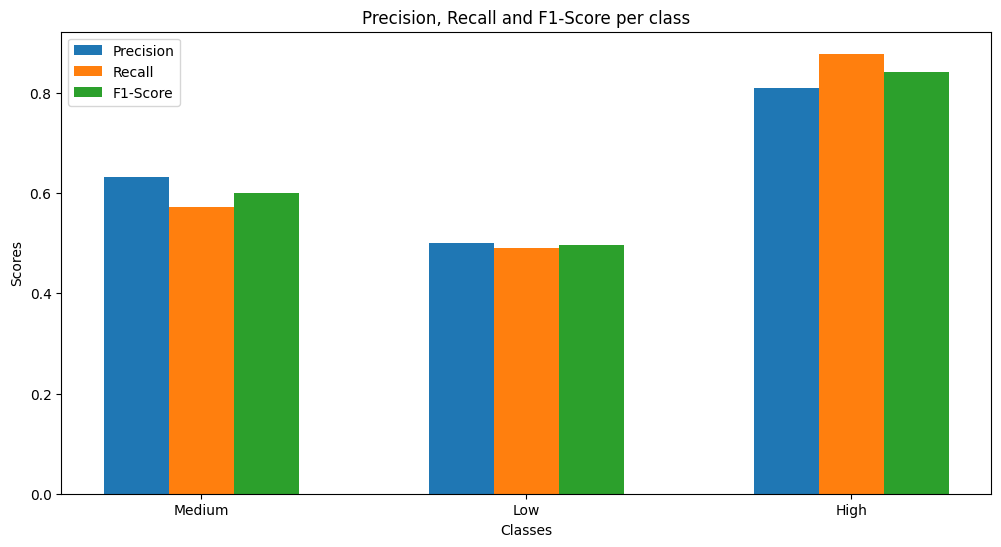

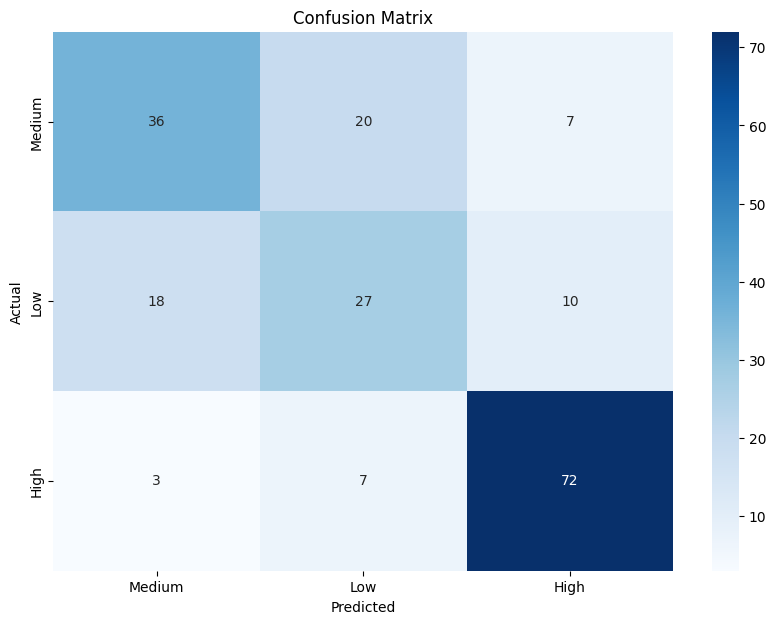

Execution Time: 0.39703869819641113 seconds
--------------------------------------------------
└── [0 - class-label: ROOT]
│   └── [909 - class-label: Medium]
│   └── [1252 - class-label: Medium]
│   │   └── [1253 - class-label: Low]
│   │   └── [1259 - class-label: Medium]
│   │   └── [1273 - class-label: Medium]
│   │   └── [1280 - class-label: Low]
│   │   └── [1285 - class-label: Low]
│   │   │   └── [1279 - class-label: Medium]
│   │   │   └── [1284 - class-label: Low]
│   └── [1302 - class-label: High]
│   └── [1327 - class-label: High]
│   │   └── [929 - class-label: Low]
│   │   │   └── [940 - class-label: High]
│   │   │   └── [946 - class-label: Low]
│   │   │   │   └── [947 - class-label: Medium]
│   │   │   │   └── [949 - class-label: High]
│   │   │   │   │   └── [950 - class-label: Medium]
│   │   │   │   │   │   └── [932 - class-label: Medium]
│   │   │   │   │   │   │   └── [59 - class-label: Medium]
│   │   │   │   │   │   │   └── [239 - class-label: Medium]
│   │   │ 

In [7]:
formal_context = FormalContext(labeled_data=labeled_train_data)
max_context_size = num_objects * num_properties
print(f"Tamaño máximo del contexto: {formal_context.max_context_size}")  
formal_context.build_lattice(debug=True, compute_parents_childs=True)

print("\nFinalizando Algoritmo:")
print("Número de conceptos formales:", len(formal_context.get_all_concepts_lattice()))

start_time = time.time()
decision_treeFCA = FCADtree.FCADecisionTree(formal_context=formal_context, max_depth=TREES_MAX_DEPTH)
results = decision_treeFCA.evaluate(X_test, y_test, debug=True, plot_results=True)
end_time = time.time()

# Imprimir el tiempo de ejecución
print(f"Execution Time: {end_time - start_time} seconds")
print("--------------------------------------------------")
#decision_treeFCA.print_tree_complete()
decision_treeFCA.print_tree_logic() 
complexity_info = decision_treeFCA.display_tree_complexity()
print(complexity_info)
print(results) 

# Prueba del árbol básico ID3

In [8]:
# Evaluación del modelo DecisionTreeID3
from src.DecisionTreeID3 import DecisionTreeID3

decision_treeid3 = DecisionTreeID3(attribute_names=properties, max_depth=TREES_MAX_DEPTH)

decision_treeid3.train_tree(data_preparer.X_train.values.tolist(), data_preparer.y_train.tolist())

predictions_treeid3 = decision_treeid3.classify_instances(X_test.values.tolist())

decision_treeid3.evaluation_metrics(y_test, predictions_treeid3, average='macro')
decision_treeid3.print_tree_structure()


Accuracy: 0.98
Precision: 0.9786935800392488
Recall: 0.9800619434765775
F1 Score: 0.9789553205266565
Confusion Matrix:
[[81  1  0]
 [ 0 55  0]
 [ 1  2 60]]
Classification Report:
              precision    recall  f1-score   support

        High       0.99      0.99      0.99        82
         Low       0.95      1.00      0.97        55
      Medium       1.00      0.95      0.98        63

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200

Attribute: Obesity_0
Category: 0.0
  Attribute: Air Pollution_1
  Category: 0.0
    Decision: High
  Category: 1.0
    Decision: Medium
Category: 1.0
  Attribute: Wheezing_5
  Category: 0.0
    Attribute: Snoring_5
    Category: 0.0
      Attribute: Fatigue_5
      Category: 0.0
        Decision: Low
      Category: 1.0
        Decision: High
    Category: 1.0
      Decision: Medium
  Category: 1.0
    Decision: Medium


# Prueba adicional de los demás modelos

Prueba con preprocesamiento, discretizados y binarizados:

In [9]:
CROSS_VALIDATION = 5
METRICS_AVERAGE = 'weighted'

tryOtherModels(X_train, X_test, y_train, y_test, CROSS_VALIDATION, selected_average=METRICS_AVERAGE)

Evaluating model: Logistic Regression
Cross-Validation Mean Accuracy: 1.0
Cross-Validation Std Accuracy: 0.0
Classifier: OneVsRestClassifier
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
[[82  0  0]
 [ 0 55  0]
 [ 0  0 63]]
Execution Time: 0.1984853744506836 seconds
--------------------------------------------------
Evaluating model: SVM
Cross-Validation Mean Accuracy: 1.0
Cross-Validation Std Accuracy: 0.0
Classifier: SVC
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
[[82  0  0]
 [ 0 55  0]
 [ 0  0 63]]
Execution Time: 1.1450650691986084 seconds
--------------------------------------------------
Evaluating model: Decision Tree
Cross-Validation Mean Accuracy: 1.0
Cross-Validation Std Accuracy: 0.0
Classifier: DecisionTreeClassifier
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
[[82  0  0]
 [ 0 55  0]
 [ 0  0 63]]
Execution Time: 0.05196237564086914 seconds
--------------------------------------------------

# TEST ESTADÍSTICO DEL FCATREE CON EL ID3 Y  EL C4.5

## Parámetros globales:

In [10]:
CLASSES_THRESHOLD = 0.6 # % de similitud de clases para la poda en el FCATREE
debug=False
max_depth = 5
random_state = 42
test_size = 0.3


OTHER_TREE_MODEL = "ID3" #primera prueba con el ID3

## Definición de funciones

In [11]:
import numpy as np
import pandas as pd
from scipy import stats
from mlxtend.evaluate import mcnemar_table, mcnemar
from scipy.stats import t as t_dist
import warnings
warnings.filterwarnings("ignore", category=UserWarning)


# test t de paridad
def paired_t_test(p):
        p_hat = np.mean(p)
        n = len(p)
        den = np.sqrt(sum([(diff - p_hat)**2 for diff in p]) / (n - 1))
        t = (p_hat * (n**(1/2))) / den
        
        p_value = t_dist.sf(t, n-1)*2
        
        return t, p_value

# PRUEBA DE TEST Z PARA DOS PORPORCIONES
def two_proportions_test(y_true, y_pred1, y_pred2):
    success_a = np.sum(y_pred1 == y_true)
    success_b = np.sum(y_pred2 == y_true)
    n_a = len(y_true)
    n_b = len(y_true)
    
    prop_a = success_a / n_a
    prop_b = success_b / n_b
    
    var_a = (prop_a * (1 - prop_a)) / n_a
    var_b = (prop_b * (1 - prop_b)) / n_b
    
    if var_a + var_b == 0:
        return 0, 1  # No hay diferencia significativa si no hay variabilidad
    
    z = (prop_a - prop_b) / np.sqrt(var_a + var_b)
    p_value = stats.norm.sf(abs(z)) * 2  # Test de dos colas
    
    return z, p_value

# PRUEBA DE MCNEMAR
def mcnemar_test(y_true, y_pred1, y_pred2):
    table = mcnemar_table(y_target=np.array(y_true), 
                          y_model1=np.array(y_pred1), 
                          y_model2=np.array(y_pred2))
    chi2, p = mcnemar(ary=table, corrected=True)
    return chi2, p

# PRUEBA T PAREADA
def resampled_paired_ttest(data_preparer, n_tests=30, test_size=None, max_depth=None):
    global random_state, OTHER_TREE_MODEL, CLASSES_THRESHOLD, debug
    p_ = []
    rng = np.random.RandomState(random_state)
    for i in range(n_tests):
        randint = rng.randint(low=0, high=32767)
        X_train, X_test, y_train, y_test = data_preparer.get_train_test_split_data_binarized(random_state=randint, test_size=test_size)

        # para el modelo FCA
        labeled_train_data = pd.concat([X_train, y_train.reset_index(drop=True)], axis=1)
        formal_context = FormalContext(labeled_data=labeled_train_data)
        formal_context.build_lattice(debug=False, compute_parents_childs=True)
        fca_model = FCADtree.FCADecisionTree(formal_context=formal_context, max_depth=max_depth, classes_threshold=CLASSES_THRESHOLD)
        
        # para el otro modelo ID3
        properties = [prop for prop in labeled_train_data.columns if prop != 'objective_target']

        if(OTHER_TREE_MODEL == "C45"):
            other_tree_model = DecisionTreeC45(attribute_names=properties, max_depth=max_depth)
        else:
            other_tree_model = DecisionTreeID3(attribute_names=properties, max_depth=max_depth)


        other_tree_model.train_tree(data_preparer.X_train.values.tolist(), data_preparer.y_train.tolist())

        
        accuracy = accuracy_score(y_test, fca_model.classify_instances(X_test))
        if(debug):
            print("FCAMODEL: ", accuracy)
        accuracy = accuracy_score(y_test, other_tree_model.classify_instances(X_test.values.tolist()))
        if(debug):
            print("OTHER: ", accuracy)
        

        acc1 = accuracy_score(y_test, fca_model.classify_instances(X_test))
        acc2 = accuracy_score(y_test, other_tree_model.classify_instances(X_test.values.tolist()))
        p_.append(acc1 - acc2)

    t_stat, p_value = paired_t_test(p_)
    return t_stat, p_value



# CV DE 5 ITERACIONES DE 2 PLIEGUES
def cross_val_5x2_test(data_preparer, test_size, max_depth):
    global random_state, OTHER_TREE_MODEL, CLASSES_THRESHOLD,  debug

    def five_two_statistic(p1, p2):
        p1 = np.array(p1)
        p2 = np.array(p2)
        p_hat = (p1 + p2) / 2
        s = (p1 - p_hat)**2 + (p2 - p_hat)**2
        t = p1[0] / np.sqrt(1/5. * sum(s))
        
        p_value = t_dist.sf(t, 5)*2
        
        return t, p_value

    p_1 = []
    p_2 = []

    rng = np.random.RandomState(42)
    for i in range(5):
        randint = rng.randint(low=0, high=32767)
        X_train, X_test, y_train, y_test = data_preparer.get_train_test_split_data_binarized(debug=debug, random_state=randint, test_size=test_size)

        # p1 evaluacion de train-test
            # para el modelo FCA
        labeled_train_data = pd.concat([X_train, y_train.reset_index(drop=True)], axis=1)
        formal_context = FormalContext(labeled_data=labeled_train_data)
        formal_context.build_lattice(debug=False, compute_parents_childs=True)
        fca_model = FCADtree.FCADecisionTree(formal_context=formal_context, max_depth=max_depth, classes_threshold=CLASSES_THRESHOLD)
        
            # para el otro modelo ID3
        properties = [prop for prop in labeled_train_data.columns if prop != 'objective_target']

        if(OTHER_TREE_MODEL == "C45"):
            other_tree_model = DecisionTreeC45(attribute_names=properties, max_depth=max_depth)
        else:
            other_tree_model = DecisionTreeID3(attribute_names=properties, max_depth=max_depth)


        other_tree_model.train_tree(data_preparer.X_train.values.tolist(), data_preparer.y_train.tolist())


        acc1 = accuracy_score(y_test, fca_model.classify_instances(X_test))
        acc2 = accuracy_score(y_test, other_tree_model.classify_instances(X_test.values.tolist()))
        p_1.append(acc1 - acc2)


        # p2 evaluacion de test-train
            # para el modelo FCA
        labeled_train_data = pd.concat([X_test, y_test.reset_index(drop=True)], axis=1)
        formal_context = FormalContext(labeled_data=labeled_train_data)
        formal_context.build_lattice(debug=False, compute_parents_childs=True)
        fca_model = FCADtree.FCADecisionTree(formal_context=formal_context, max_depth=max_depth, classes_threshold=CLASSES_THRESHOLD)
        
            # para el otro modelo ID3
        properties = [prop for prop in labeled_train_data.columns if prop != 'objective_target']

        if(OTHER_TREE_MODEL == "C45"):
            other_tree_model = DecisionTreeC45(attribute_names=properties, max_depth=max_depth)
        else:
            other_tree_model = DecisionTreeID3(attribute_names=properties, max_depth=max_depth)


        other_tree_model.train_tree(data_preparer.X_test.values.tolist(), data_preparer.y_test.tolist())

        acc1 = accuracy_score(y_train, fca_model.classify_instances(X_train))
        acc2 = accuracy_score(y_train, other_tree_model.classify_instances(X_train.values.tolist()))
        p_2.append(acc1 - acc2)

    t, p = five_two_statistic(p_1, p_2)
    return t, p


def test_statistical(random_state, test_size, max_depth, data_preparer):
    X_train, X_test, y_train, y_test = data_preparer.get_train_test_split_data_binarized(debug=debug, random_state=random_state, test_size=test_size)

    print("#############################################################################")
    if(debug):
        print("\n\n\ESTRUCTURAS de datos de X e Y:\n", X, y, X_train, X_test, y_train, y_test)

    # Inicializar y proabr el modelo FCA
    labeled_train_data = pd.concat([X_train, y_train.reset_index(drop=True)], axis=1)
    formal_context = FormalContext(labeled_data=labeled_train_data)
    formal_context.build_lattice(debug=False, compute_parents_childs=True)
    print("\nFinalizando Algoritmo del retículo:")
    print("Número de conceptos formales:", len(formal_context.get_all_concepts_lattice()))
    fca_model = FCADtree.FCADecisionTree(formal_context=formal_context, max_depth=max_depth, classes_threshold=CLASSES_THRESHOLD)
    
    if(debug):
        fca_model.print_tree_logic()
        fca_model.print_tree_structure()

    fca_predicted_labels = fca_model.classify_instances(X_test)

    # Inicializar y probar el otro modelo
    properties = [prop for prop in labeled_train_data.columns if prop != 'objective_target']
    
    if(OTHER_TREE_MODEL == "C45"):
        other_tree_model = DecisionTreeC45(attribute_names=properties, max_depth=max_depth)
    else:
        other_tree_model = DecisionTreeID3(attribute_names=properties, max_depth=max_depth)

    other_tree_model.train_tree(data_preparer.X_train.values.tolist(), data_preparer.y_train.tolist())
    predictions_other_tree= other_tree_model.classify_instances(X_test.values.tolist())

    # Two Proportions Test
    z, p_proportions = two_proportions_test(y_test , fca_predicted_labels, predictions_other_tree)
    #print("two_proportions_test:", z, p_proportions)

     # McNemar’s Test
    chi2_mcnemar, p_mcnemar = mcnemar_test(y_test, fca_predicted_labels, predictions_other_tree)
    #print("mcnemar_test", chi2_mcnemar, p_mcnemar)
    
    # Resampled Paired t-test
    t_resampled, p_resampled = resampled_paired_ttest(data_preparer, n_tests=30, test_size=test_size, max_depth=max_depth)
    #print("resampled_paired_ttest", t_resampled, p_resampled)

    
    # 5x2 Cross-Validation Test
    t_5x2, p_5x2 = cross_val_5x2_test(data_preparer, test_size, max_depth)
    #print("cross_val_5x2_test", t_5x2, p_5x2)
    
    results = {
        "Two Proportions Test": (z, p_proportions),
        "McNemars Test": (chi2_mcnemar, p_mcnemar),
        "Resampled Paired t-test": (t_resampled, p_resampled),
        "5x2 Cross-Validation Test": (t_5x2, p_5x2)
    }
    
    return results


print(f"Parámetros de configuración:")
print(f"Umbral de similitud de clases para la poda (CLASSES_THRESHOLD): {CLASSES_THRESHOLD}")
print(f"Umbrales de los atributos continuos usados en la discretización como en el c4.5:  {thresholds}")
print(f"Profundidad máxima del árbol (max_depth): {max_depth}")
print(f"Estado aleatorio (random_state): {random_state}")
print(f"Tamaño del conjunto de prueba (test_size): {test_size}")

Parámetros de configuración:
Umbral de similitud de clases para la poda (CLASSES_THRESHOLD): 0.6
Umbrales de los atributos continuos usados en la discretización como en el c4.5:  {11: [6.5], 14: [7.0], 17: [4.5], 9: [4.5]}
Profundidad máxima del árbol (max_depth): 5
Estado aleatorio (random_state): 42
Tamaño del conjunto de prueba (test_size): 0.3


## Prueba con el ID3

In [12]:
# Comparación estadística
# Entre FCADecisionTree y DecisionTreeID3
results_with_id3 = test_statistical(random_state, test_size, max_depth, data_preparer)

print("\nResultados entre y and DecisionTreeID3:")
for test_name, (statistic, p_value) in results_with_id3.items():
    print(f"{test_name}: Statistic = {statistic}, p-value = {p_value}")


#############################################################################

Finalizando Algoritmo del retículo:
Número de conceptos formales: 5428

Resultados entre y and DecisionTreeID3:
Two Proportions Test: Statistic = -13.023872179226446, p-value = 8.951391425870443e-39
McNemars Test: Statistic = 107.648, p-value = 3.210156119249516e-25
Resampled Paired t-test: Statistic = -104.04216396438854, p-value = 2.0
5x2 Cross-Validation Test: Statistic = -12.05854608083702, p-value = 1.999930761200745


## Prueba con el C4.5

In [13]:
OTHER_TREE_MODEL = "C45"

# Comparación estadística
# Entre FCADecisionTree y DecisionTreeC45
results_with_id3 = test_statistical(random_state, test_size, max_depth, data_preparer)
print("\nResults between FCADecisionTree and DecisionTreeC45:")
for test_name, (statistic, p_value) in results_with_id3.items():
    print(f"{test_name}: Statistic = {statistic}, p-value = {p_value}")


#############################################################################

Finalizando Algoritmo del retículo:
Número de conceptos formales: 5428

Results between FCADecisionTree and DecisionTreeC45:
Two Proportions Test: Statistic = -12.83774544108602, p-value = 1.0076643332848203e-37
McNemars Test: Statistic = 98.69402985074628, p-value = 2.946891805603799e-23
Resampled Paired t-test: Statistic = -109.39778474081834, p-value = 2.0
5x2 Cross-Validation Test: Statistic = -14.926775473392023, p-value = 1.9999755761926552
